## Weatherpy Homework

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint

# Import API key
from api_key import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### General Cities List

In [6]:
## Generate cities list and dependencies setup

# List for holding lat_lngs and cities
lat_lng = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lng = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [7]:
# Build URL for API calls including cities and unit of measure

unit = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
url_ping = f"{url}appid={weather_key}&q={city}&units={unit}" 
response_json = requests.get(url_ping).json()
pprint(response_json)




{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -16.4833, 'lon': -151.75},
 'dt': 1667755609,
 'id': 4034551,
 'main': {'feels_like': 78.98,
          'grnd_level': 1010,
          'humidity': 79,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 78.98,
          'temp_max': 78.98,
          'temp_min': 78.98},
 'name': 'Faanui',
 'rain': {'1h': 0.31},
 'sys': {'country': 'PF', 'sunrise': 1667748447, 'sunset': 1667794431},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 303, 'gust': 23.06, 'speed': 20.69}}


In [8]:
# Lists for results
lat = []
lon = []
city_found = []
temp = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []

# Counter for print list
count = 0

# for Loop to iterate through cities selected
for city in cities:
    print(f'Record found {count} | {city_found}')
    count += 1

    url_ping = f"{url}appid={weather_key}&q={city}&units={unit}" 
    response_json = requests.get(url_ping).json()

    # Create dictionary for data from API calls
    weather_data = {}

    # Exceptions for cities to skip
    try:        
        lat.append(response_json["coord"]["lat"])
        lon.append(response_json["coord"]["lon"])
        temp.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        windspeed.append(response_json["wind"]["speed"])
        date.append(response_json["dt"])
        country.append(response_json["sys"]["country"])
        city_found.append(response_json["name"])
        pprint(f'City Found: {city_found}')
    except:
        pprint(f'City NOT found: Skipping...')
        continue
print("-----------------------")
print("Data Complete")
print("------------------------")

Record found 0 | []
"City Found: ['Punta Arenas']"
Record found 1 | ['Punta Arenas']
"City Found: ['Punta Arenas', 'Atuona']"
Record found 2 | ['Punta Arenas', 'Atuona']
"City Found: ['Punta Arenas', 'Atuona', 'Cape Town']"
Record found 3 | ['Punta Arenas', 'Atuona', 'Cape Town']
"City Found: ['Punta Arenas', 'Atuona', 'Cape Town', 'Albany']"
Record found 4 | ['Punta Arenas', 'Atuona', 'Cape Town', 'Albany']
"City Found: ['Punta Arenas', 'Atuona', 'Cape Town', 'Albany', 'Nikolskoye']"
Record found 5 | ['Punta Arenas', 'Atuona', 'Cape Town', 'Albany', 'Nikolskoye']
("City Found: ['Punta Arenas', 'Atuona', 'Cape Town', 'Albany', 'Nikolskoye', "
 "'Bluff']")
Record found 6 | ['Punta Arenas', 'Atuona', 'Cape Town', 'Albany', 'Nikolskoye', 'Bluff']
("City Found: ['Punta Arenas', 'Atuona', 'Cape Town', 'Albany', 'Nikolskoye', "
 "'Bluff', 'Maragogi']")
Record found 7 | ['Punta Arenas', 'Atuona', 'Cape Town', 'Albany', 'Nikolskoye', 'Bluff', 'Maragogi']
("City Found: ['Punta Arenas', 'Atuona'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Create data frame 
weather_data = pd.DataFrame({ "City": city_found,
                                "Country": country,
                                "Latitude": lat,
                                "Longitude": lon,
                                "Temperature": temp,
                                "Humidity": humidity,
                                "Cloudiness": cloudiness,
                                "Windspeed": windspeed,
                                "Date": date
                                })
weather_data


City Country  Latitude  Longitude  Temperature  Humidity  \
0    Punta Arenas      CL  -53.1500   -70.9167        62.71        48   
1          Atuona      PF   -9.8000  -139.0333        76.68        69   
2       Cape Town      ZA  -33.9258    18.4232        73.11        68   
3          Albany      US   42.6001   -73.9662        71.26        83   
4      Nikolskoye      RU   59.7035    30.7861        35.49        96   
..            ...     ...       ...        ...          ...       ...   
566        Kailua      US   21.4022  -157.7394        77.14        81   
567         Tupik      RU   54.4253   119.9327         5.16        91   
568        Khowst      AF   33.3833    69.8833        53.76        68   
569       Erenhot      CN   43.6475   111.9767        30.45        46   
570   San Ignacio      BZ   17.1561   -89.0714        87.94        66   

     Cloudiness  Windspeed        Date  
0             0      19.57  1667755347  
1            93      10.69  1667755612  
2             0       6.91  1667755546  
3           100       1.01  1667755545  
4           100       7.40  1667755613  
..          ...        ...         ...  
566          93      18.32  1667755803  
567          13       3.87  1667755803  
568          96       1.68  1667755804  
569           0       4.52  1667755804  
570          20       4.61  1667755804  

[571 rows x 9 columns]

In [17]:
# Output File (CSV)
weather_output_file = "weather_data.csv"
weather_data.to_csv(weather_output_file, index_label="city", header=True)

In [20]:
# Create and display summary of dataframe
summary_weather = weather_data.describe()
summary_weather

Latitude   Longitude  Temperature    Humidity  Cloudiness  \
count  571.000000  571.000000   571.000000  571.000000  571.000000   
mean    19.973019   21.016079    57.764396   72.141856   56.462347   
std     33.677730   93.632533    24.909189   20.839382   39.310950   
min    -54.800000 -175.200000   -24.380000    8.000000    0.000000   
25%     -6.308650  -64.650000    41.355000   63.000000   17.000000   
50%     25.519800   27.430600    66.880000   76.000000   64.000000   
75%     47.492950  110.323650    76.955000   88.000000   99.000000   
max     78.218600  179.316700    95.290000  100.000000  100.000000   

        Windspeed          Date  
count  571.000000  5.710000e+02  
mean     8.159597  1.667756e+09  
std      5.886155  8.277054e+01  
min      0.000000  1.667755e+09  
25%      3.740000  1.667756e+09  
50%      6.640000  1.667756e+09  
75%     10.905000  1.667756e+09  
max     37.980000  1.667756e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#  Get the indices of cities that have humidity over 100%. 
count = 0
humidity_high = []

# Find indices with hummidity > 100%
for value in weather_data["Humidity"]:
    if value > 100 == True:
        humidity_high.appent(count)
        count += 1
    else:
        count += 1

# Indicies to drop
if humidity_high == []:
    print("No cities with humidity > 100%")
else:
    print(f'Drop indices {humidity_high}')

No cities with humidity > 100%


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'images\\lat_vs_temp.png'

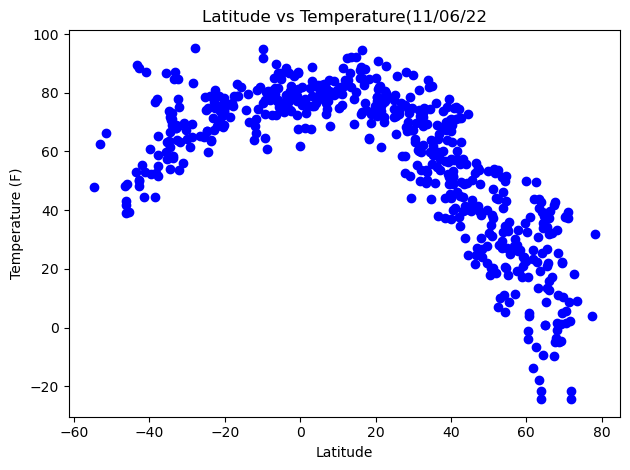

In [26]:
# Latitude vs temp scatter plot
x_values = weather_data["Latitude"]
y_values = weather_data["Temperature"]
plt.scatter(x_values, y_values, color='blue', edgecolors='black')
plt.title("Latitude vs Temperature(11/06/22)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.tight_layout()
plt.savefig("images\lat_vs_temp.png")
plt.show()